In [96]:
# importing libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


# Strategy 

1. Split the training data into two datasets, one as real_train and one as test_train
2. Train different model using the real_train and test the model on the test_train dataset
3. After obtaining the best model, retrain the best model on the full real_train dataset
4. Use the final model to test on the test_final

# Reading in Data

In [97]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
print(train_data.info())
print(train_data.describe())
print(train_data.columns)
print(train_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## Doing analysis on the real_train dataset

In [99]:
real_train = train_data
real_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q


# Data Analysis
Several factors to explore:
1. Do Gender affect Survival Rate? 
2. Do PClass affect Survival Rate? (PClass is a pseducategory in Titanic Dataset, use to represent the social classes)
3. Do Age affect Survival Rate? 
4. Do SibSp affect Survival Rate? 
5. Do Parch affect Survival Rate? 

Random (or fun) analysis:
1. Do the fare paid by the people reflect their PClass? 

## Gender Affect Survival Rate?

In [100]:
total_male = real_train[real_train.Sex == "male"]
survived_male = total_male[total_male.Survived == 1]

total_female = real_train[real_train.Sex == "female"]
survived_female = total_female[total_female.Survived == 1]

print("Survived Male Rate = ",len(survived_male)/len(total_male), " | Survivied Female Rate = ",len(survived_female)/len(total_female))

Survived Male Rate =  0.18890814558058924  | Survivied Female Rate =  0.7420382165605095


We can see from the analysis is that IN GENERAL, Female has higher survival rate compare to Male. But after doing some research, it is found out that it is actually depends on the captain, whether he or she ordered for WCF (Woman and Children First), as shown in [THIS](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3421183/) research paper, so I think that the captain on the Titanic order for WCF!

PS: You can scroll all the way down to the Result and Discussion to read the final result. 

Text(0.5, 1.0, 'Survival Count of different Sex')

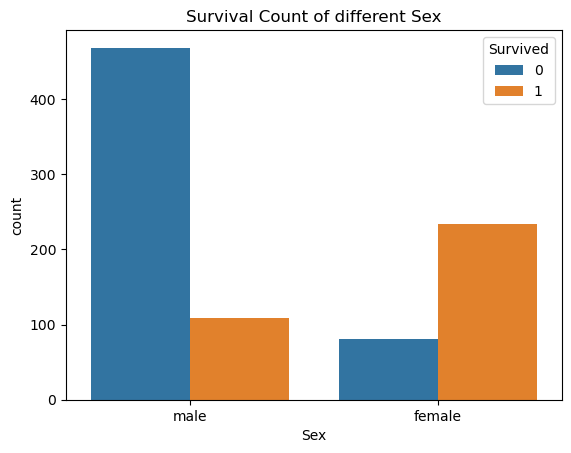

In [101]:
sns.countplot(data = real_train, x = "Sex",hue = "Survived").set_title("Survival Count of different Sex")

## Pclass affect Survival Rate?

<Axes: xlabel='Pclass', ylabel='count'>

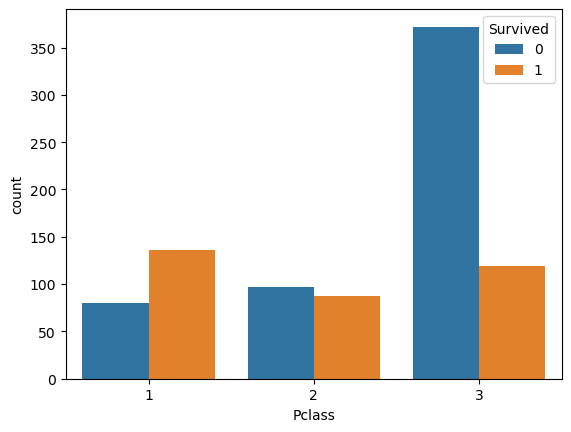

In [102]:
sns.countplot(data = real_train, x = "Pclass" , hue = "Survived")

Higher Pclass does have an effect on their survival rate. (Higher PClass, means that they have lower socioeconomy status). 

<Axes: xlabel='Pclass', ylabel='Fare'>

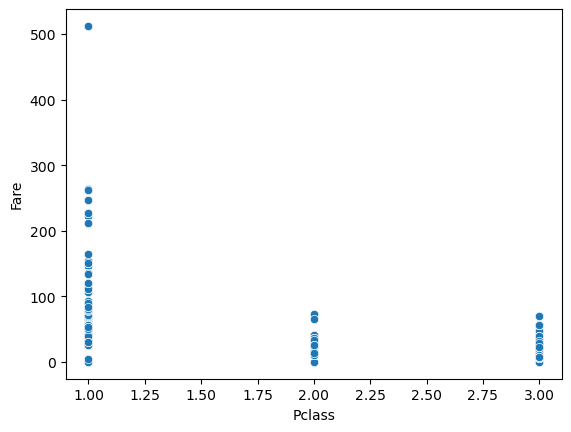

In [103]:
sns.scatterplot(data = real_train , x = "Pclass", y = "Fare")

In [104]:
Social_Class = real_train.groupby(["Pclass"])
Social_Class.describe()["Fare"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


As view in the table above, it can be seen that the higher the fare paid by an individual, the lower the Pclass of an individual. PROBABLY

## Age Affect Survival Rate? 

In [105]:
real_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

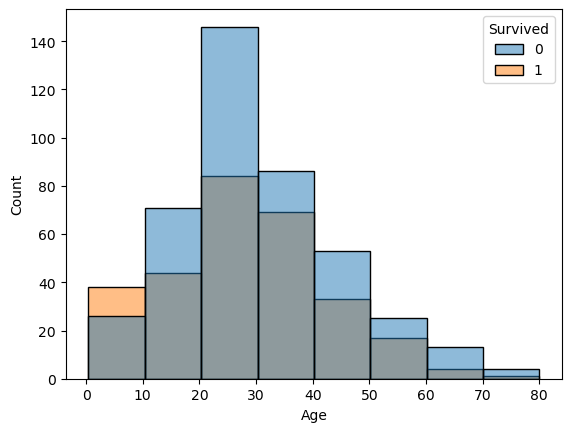

In [106]:
sns.histplot(data=real_train, x="Age", bins=8,hue="Survived")

In [107]:
real_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [108]:
# Survival Rate by Age Category
def age_categorising(row):
	if (row.Age > 0 and row.Age <= 10):
		return "0_10"
	elif (row.Age > 10 and row.Age <= 20):
		return "10_20"
	elif (row.Age > 20 and row.Age <= 30):
		return "20_30" 
	elif (row.Age > 30 and row.Age <= 40):
		return "30_40" 
	elif (row.Age > 40 and row.Age <= 50):
		return "40_50" 
	elif (row.Age > 50 and row.Age <= 60):
		return "50_60" 
	elif (row.Age > 60 and row.Age <= 70):
		return "60_70"  
	elif (row.Age > 70 and row.Age <= 80):
		return "70_80" 
	elif (row.Age > 80 and row.Age <= 90):
		return "80_90" 
	else:
		return "-"

In [109]:
real_train["Age_Category"] = real_train.apply(age_categorising,axis=1)
real_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20_30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30_40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20_30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30_40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20_30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10_20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20_30


<Axes: xlabel='Age_Category', ylabel='count'>

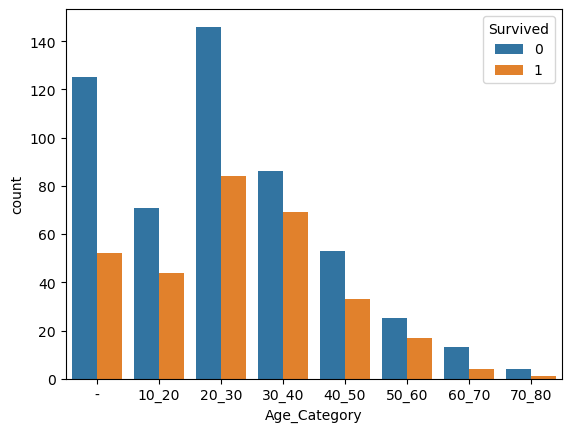

In [110]:
sns.countplot(data = real_train , x = "Age_Category" , hue = "Survived" , order = ["-","10_20","20_30","30_40","40_50","50_60","60_70","70_80"])

In [111]:
Age_Survival_Data = real_train.groupby("Age_Category").describe().Survived
Age_Survival_Data

,count,mean,std,min,25%,50%,75%,max
Age_Category,,,,,,,,
-,177.0,0.293785,0.456787,0.0,0.0,0.0,1.0,1.0
0_10,64.0,0.593750,0.495015,0.0,0.0,1.0,1.0,1.0
10_20,115.0,0.382609,0.488151,0.0,0.0,0.0,1.0,1.0
20_30,230.0,0.365217,0.482541,0.0,0.0,0.0,1.0,1.0
30_40,155.0,0.445161,0.498595,0.0,0.0,0.0,1.0,1.0
40_50,86.0,0.383721,0.489143,0.0,0.0,0.0,1.0,1.0
50_60,42.0,0.404762,0.496796,0.0,0.0,0.0,1.0,1.0
60_70,17.0,0.235294,0.437237,0.0,0.0,0.0,0.0,1.0
70_80,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


We can see from the category surivival rate mean, the age between 0 to 10 has the highest rate of survival

<Axes: xlabel='Age_Category', ylabel='mean'>

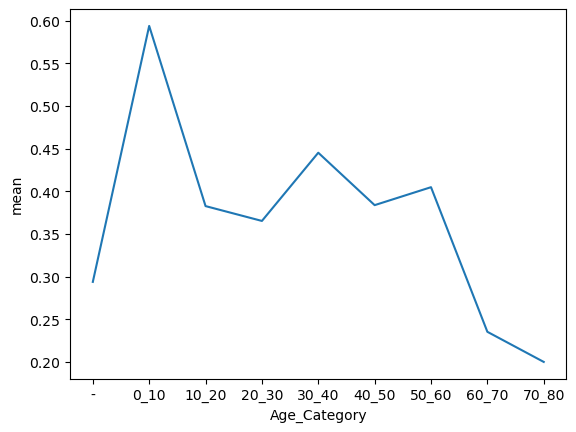

In [112]:
sns.lineplot(data = Age_Survival_Data , x = "Age_Category" , y = "mean")

## Misc

In [113]:
real_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [114]:
real_train.groupby("Cabin").describe().Survived

,count,mean,std,min,25%,50%,75%,max
Cabin,,,,,,,,
A10,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
A14,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
A16,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
A19,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
A20,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
F33,3.0,1.0,0.00000,1.0,1.0,1.0,1.0,1.0
F38,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
F4,2.0,1.0,0.00000,1.0,1.0,1.0,1.0,1.0


# Exploring Different Model
Just playing around with different model, the one that I had learned in school (more in depth) are the below 4, so I will be trying to impelement the 4 different type. 
- K-Nearest Neighbours
- Decision Trees
- Support Vector Machines 
- Neural Networks 

When applying different model, I will go through 
1. Duplicating of dataset
2. Data pre-processing
3. Splitting of dataset into model_training and model_test
4. Training of model using the model_training dataset
5. Applying the model on the model_test datas
6. Evaluation of the performance

FUTURE ME🤣:
**K-Nearest Neighbouts** and **Support Vector Machines** are not suitable for dataset as such. 

## K-Nearest Neighbours (KNN)
Before performing the K-Nearest Neighbours, since the algorithms can only deal with 2D data, I will compress the data using Principal Componenet Analysis before applying KNN 

In [115]:
PCA = real_train.copy()
PCA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20_30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30_40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20_30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30_40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20_30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10_20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20_30


In [116]:
def Sex_to_Num(row):
	if (row.Sex == "male"): return 1
	elif (row.Sex == "female"): return 0
	else: return row.Sex
PCA["Sex"] = PCA.apply(Sex_to_Num,axis=1)

def Cabin_to_Number(row):
	if (not pd.isna(row.Cabin)): 
		return ord(row.Cabin[0])
	else: return 0
PCA["Cabin"] = PCA.apply(Cabin_to_Number,axis=1)

def Embarked_to_Number(row):
	if (not pd.isna(row.Embarked)): 
		return ord(row.Embarked[0])
	else: return 0
PCA["Embarked"] = PCA.apply(Embarked_to_Number,axis=1)
PCA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,83,20_30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,67,67,30_40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,83,20_30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,67,83,30_40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,83,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,83,20_30
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,66,83,10_20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0,83,-
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,67,67,20_30


In [117]:
PCA = PCA.dropna()
PCA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,83,20_30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,67,67,30_40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,83,20_30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,67,83,30_40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,83,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,0,81,30_40
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,83,20_30
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,66,83,10_20
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,67,67,20_30


In [118]:
PCA_train = PCA.sample(600)
PCA_test = PCA.sample(100)

In [119]:
PCA_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
401,402,0,3,"Adams, Mr. John",1,26.0,0,0,341826,8.0500,0,83,20_30
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",0,34.0,0,1,231919,23.0000,0,83,30_40
627,628,1,1,"Longley, Miss. Gretchen Fiske",0,21.0,0,0,13502,77.9583,68,83,20_30
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,67,67,50_60
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",1,9.0,1,1,C.A. 37671,15.9000,0,83,0_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,659,0,2,"Eitemiller, Mr. George Floyd",1,23.0,0,0,29751,13.0000,0,83,20_30
483,484,1,3,"Turkula, Mrs. (Hedwig)",0,63.0,0,0,4134,9.5875,0,83,60_70
63,64,0,3,"Skoog, Master. Harald",1,4.0,3,2,347088,27.9000,0,83,0_10
494,495,0,3,"Stanley, Mr. Edward Roland",1,21.0,0,0,A/4 45380,8.0500,0,83,20_30


In [120]:
#Performing PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

features = ['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare',"Cabin","Embarked"]

# Separating out the features
PCA_train_x = PCA_train.loc[:, features].values

# Separating out the target
PCA_train_y = PCA_train.loc[:,['Survived']].values

# Standardizing the features
PCA_train_x = StandardScaler().fit_transform(PCA_train_x)
PCA_train_x

array([[ 0.9200413 ,  0.78288136, -0.25198704, ..., -0.50506174,
        -0.58985805,  0.45560116],
       [-0.27481753, -1.27733275,  0.30293081, ..., -0.22724947,
        -0.58985805,  0.45560116],
       [-1.46967636, -1.27733275, -0.5988107 , ...,  0.79402743,
         1.71180688,  0.45560116],
       ...,
       [ 0.9200413 ,  0.78288136, -1.77801115, ..., -0.13619395,
        -0.58985805,  0.45560116],
       [ 0.9200413 ,  0.78288136, -0.5988107 , ..., -0.50506174,
        -0.58985805,  0.45560116],
       [-1.46967636,  0.78288136,  0.30293081, ..., -0.16128067,
        -0.58985805,  0.45560116]])

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCA_train_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

PCA_train_finaldf = pd.concat([principalDf, PCA_train["Survived"]], axis = 1)


In [122]:
PCA_train_finaldf

,principal component 1,principal component 2,Survived
0,-1.360126,-0.863975,0.0
1,-0.077913,0.367551,1.0
2,2.057464,0.227632,1.0
3,3.383791,-0.056124,1.0
4,-1.647832,0.933983,0.0
...,...,...,...
754,NaN,NaN,1.0
735,NaN,NaN,0.0
831,NaN,NaN,1.0
889,NaN,NaN,1.0


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

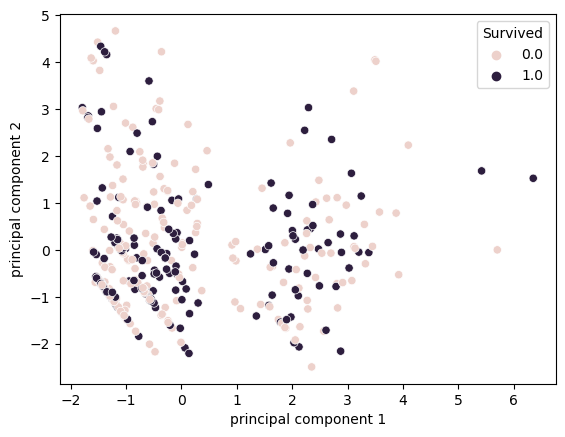

In [123]:
sns.scatterplot(data = PCA_train_finaldf, x = "principal component 1" , y = "principal component 2" , hue = "Survived")

<Axes: xlabel='principal component 1', ylabel='count'>

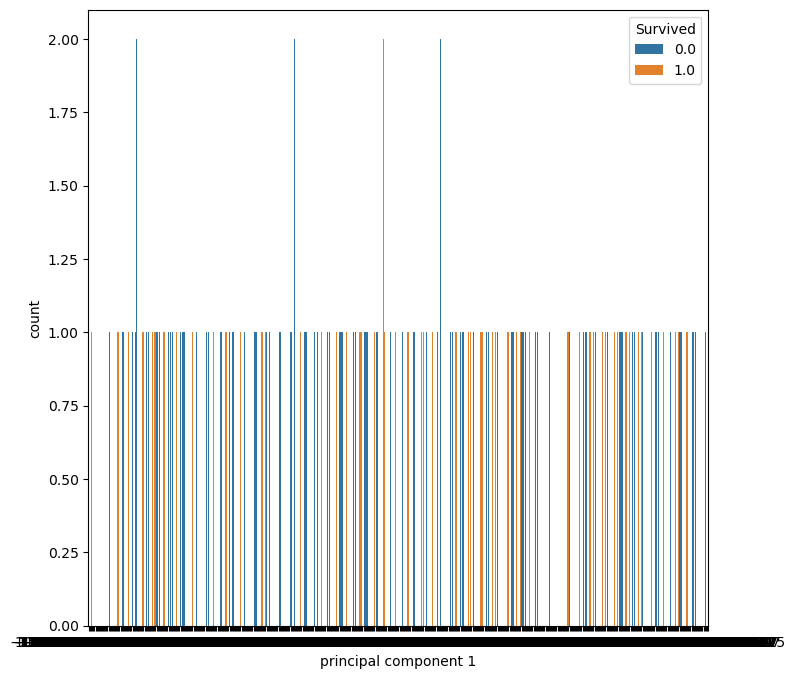

In [124]:
fig = plt.figure(figsize = (8,8))
sns.countplot(data = PCA_train_finaldf, x = "principal component 1" , hue = "Survived" )

TOUGH TO DO K-NEAREST NEIGHBOUR, so we will try the next model🤣

## Decision Tree

### Single Tree

In [125]:
TREE = real_train.copy()

In [126]:
def Sex_to_Num(row):
	if (row.Sex == "male"): return 1
	elif (row.Sex == "female"): return 0
	else: return row.Sex
TREE["Sex"] = TREE.apply(Sex_to_Num,axis=1)

def Cabin_to_Number(row):
	if (not pd.isna(row.Cabin)): 
		return ord(row.Cabin[0])
	else: return 0
TREE["Cabin"] = TREE.apply(Cabin_to_Number,axis=1)

def Embarked_to_Number(row):
	if (not pd.isna(row.Embarked)): 
		return ord(row.Embarked[0])
	else: return 0
TREE["Embarked"] = TREE.apply(Embarked_to_Number,axis=1)
TREE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,83,20_30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,67,67,30_40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,83,20_30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,67,83,30_40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,83,30_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,83,20_30
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,66,83,10_20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0,83,-
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,67,67,20_30


In [127]:
TREE_train = TREE.sample(600)
TREE_test = TREE.sample(200)

In [128]:
from sklearn import tree

TREE_features = ["Pclass", "Sex","Age", "SibSp", "Parch","Fare","Cabin","Embarked"]
TREE_train_X = TREE_train[TREE_features]
TREE_train_Y = TREE_train["Survived"]

TREE_model = tree.DecisionTreeClassifier()
TREE_model.fit(TREE_train_X,TREE_train_Y)

DecisionTreeClassifier()

In [129]:
TREE_train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
20,2,1,35.0,0,0,26.0000,0,83
359,3,0,NaN,0,0,7.8792,0,81
23,1,1,28.0,0,0,35.5000,65,83
508,3,1,28.0,0,0,22.5250,0,83
1,1,0,38.0,1,0,71.2833,67,67
...,...,...,...,...,...,...,...,...
27,1,1,19.0,3,2,263.0000,67,83
318,1,0,31.0,0,2,164.8667,67,83
684,2,1,60.0,1,1,39.0000,0,83
174,1,1,56.0,0,0,30.6958,65,67


In [130]:
TREE_test_X = TREE_test[TREE_features]
TREE_test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
853,1,0,16.0,0,1,39.4000,68,83
209,1,1,40.0,0,0,31.0000,65,67
300,3,0,NaN,0,0,7.7500,0,81
460,1,1,48.0,0,0,26.5500,69,83
830,3,0,15.0,1,0,14.4542,0,67
...,...,...,...,...,...,...,...,...
34,1,1,28.0,1,0,82.1708,0,67
605,3,1,36.0,1,0,15.5500,0,83
40,3,0,40.0,1,0,9.4750,0,83
737,1,1,35.0,0,0,512.3292,66,67


In [131]:
TREE_test["Predicted Survival"] = TREE_model.predict(TREE_test_X)
TREE_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Predicted Survival
853,854,1,1,"Lines, Miss. Mary Conover",0,16.0,0,1,PC 17592,39.4000,68,83,10_20,1
209,210,1,1,"Blank, Mr. Henry",1,40.0,0,0,112277,31.0000,65,67,30_40,0
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",0,NaN,0,0,9234,7.7500,0,81,-,1
460,461,1,1,"Anderson, Mr. Harry",1,48.0,0,0,19952,26.5500,69,83,40_50,0
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",0,15.0,1,0,2659,14.4542,0,67,10_20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,35,0,1,"Meyer, Mr. Edgar Joseph",1,28.0,1,0,PC 17604,82.1708,0,67,20_30,0
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",1,36.0,1,0,349910,15.5500,0,83,30_40,0
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,40.0,1,0,7546,9.4750,0,83,30_40,0
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,66,67,30_40,0


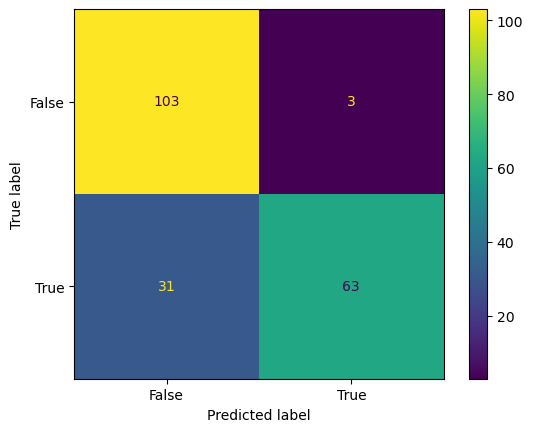

In [132]:
# CONFUSION MATRIX
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(TREE_test["Survived"], TREE_test["Predicted Survival"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [133]:
metrics.f1_score(TREE_test["Survived"], TREE_test["Predicted Survival"], average="weighted")

0.8250416666666667

### Random Forest

In [134]:
FOREST = real_train.copy()

def Sex_to_Num(row):
	if (row.Sex == "male"): return 1
	elif (row.Sex == "female"): return 0
	else: return row.Sex
FOREST["Sex"] = FOREST.apply(Sex_to_Num,axis=1)

def Cabin_to_Number(row):
	if (not pd.isna(row.Cabin)): 
		return ord(row.Cabin[0])
	else: return 0
FOREST["Cabin"] = FOREST.apply(Cabin_to_Number,axis=1)

def Embarked_to_Number(row):
	if (not pd.isna(row.Embarked)): 
		return ord(row.Embarked[0])
	else: return 0
FOREST["Embarked"] = FOREST.apply(Embarked_to_Number,axis=1)

FOREST = FOREST.replace(np.nan,0)

In [135]:
FOREST_train = FOREST.sample(600)
FOREST_test = FOREST.sample(200)

In [136]:
from sklearn.ensemble import RandomForestClassifier

FOREST_features = ["Pclass", "Sex", "Age","SibSp", "Parch","Fare","Cabin","Embarked"]

FOREST_train_X = FOREST_train[FOREST_features]
FOREST_train_Y = FOREST_train["Survived"]

FOREST_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
FOREST_model.fit(FOREST_train_X, FOREST_train_Y)

RandomForestClassifier(max_depth=5, random_state=1)

In [137]:
# TESTING ON THE TEST DATA
FOREST_test_X = FOREST_test[features]
FOREST_test["Predicted Survival"] = FOREST_model.predict(FOREST_test_X)

FOREST_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Predicted Survival
454,455,0,3,"Peduzzi, Mr. Joseph",1,0.0,0,0,A/5 2817,8.0500,0,83,-,0
574,575,0,3,"Rush, Mr. Alfred George John",1,16.0,0,0,A/4. 20589,8.0500,0,83,10_20,0
764,765,0,3,"Eklund, Mr. Hans Linus",1,16.0,0,0,347074,7.7750,0,83,10_20,0
396,397,0,3,"Olsson, Miss. Elina",0,31.0,0,0,350407,7.8542,0,83,30_40,0
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",1,32.0,0,0,SOTON/O.Q. 392078,8.0500,69,83,30_40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,0,3,"Bengtsson, Mr. John Viktor",1,26.0,0,0,347068,7.7750,0,83,20_30,0
806,807,0,1,"Andrews, Mr. Thomas Jr",1,39.0,0,0,112050,0.0000,65,83,30_40,0
609,610,1,1,"Shutes, Miss. Elizabeth W",0,40.0,0,0,PC 17582,153.4625,67,83,30_40,1
100,101,0,3,"Petranec, Miss. Matilda",0,28.0,0,0,349245,7.8958,0,83,20_30,0


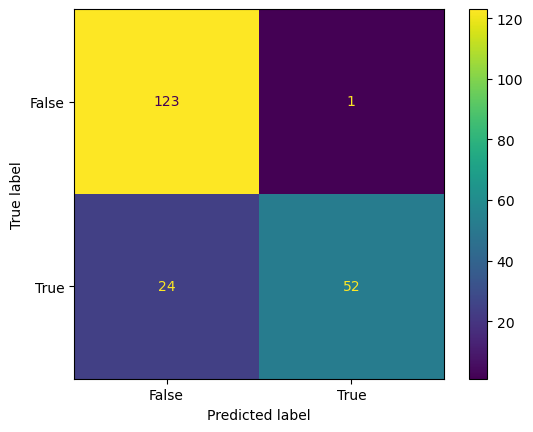

In [138]:
# CONFUSION MATRIX
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(FOREST_test["Survived"], FOREST_test["Predicted Survival"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [139]:
metrics.f1_score(FOREST_test["Survived"], FOREST_test["Predicted Survival"], average="weighted")

0.8691610171915672

#### Customising the parameters to find the optimal parameters

In [140]:
FOREST_parameter_result = []
for depth in range(2,8):
	for estimators in range(50,550,50):
		FOREST_train_X = FOREST_train[FOREST_features]
		FOREST_train_Y = FOREST_train["Survived"]

		FOREST_model = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=1)
		FOREST_model.fit(FOREST_train_X, FOREST_train_Y)

		FOREST_test_X = FOREST_test[features]
		FOREST_test["Predicted Survival"] = FOREST_model.predict(FOREST_test_X)

		f1_score = metrics.f1_score(FOREST_test["Survived"], FOREST_test["Predicted Survival"], average="weighted")
		FOREST_parameter_result.append([depth,estimators,f1_score])
		print("Depth: ",depth," | Estimatos: ",estimators," | f1 score: ",f1_score)
FOREST_parameter_result = pd.DataFrame(FOREST_parameter_result)

Depth:  2  | Estimatos:  50  | f1 score:  0.8135305685186816
Depth:  2  | Estimatos:  100  | f1 score:  0.8088078541374475
Depth:  2  | Estimatos:  150  | f1 score:  0.8099687174139728
Depth:  2  | Estimatos:  200  | f1 score:  0.8099687174139728
Depth:  2  | Estimatos:  250  | f1 score:  0.8099687174139728


Depth:  2  | Estimatos:  300  | f1 score:  0.8088078541374475
Depth:  2  | Estimatos:  350  | f1 score:  0.8099687174139728
Depth:  2  | Estimatos:  400  | f1 score:  0.8088078541374475
Depth:  2  | Estimatos:  450  | f1 score:  0.8088078541374475
Depth:  2  | Estimatos:  500  | f1 score:  0.8088078541374475
Depth:  3  | Estimatos:  50  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  100  | f1 score:  0.8052620345533731
Depth:  3  | Estimatos:  150  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  200  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  250  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  300  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  350  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  400  | f1 score:  0.8088078541374475
Depth:  3  | Estimatos:  450  | f1 score:  0.8099687174139728
Depth:  3  | Estimatos:  500  | f1 score:  0.8099687174139728
Depth:  4  | Estimatos:  50  | f1 score:  0.82631478757463
Depth:  4  |

In [141]:
FOREST_parameter_result = FOREST_parameter_result.rename(columns={0:'Depth',1:'Estimators',2:'f1_score'})
FOREST_parameter_result

,Depth,Estimators,f1_score
0,2,50,0.813531
1,2,100,0.808808
2,2,150,0.809969
3,2,200,0.809969
4,2,250,0.809969
5,2,300,0.808808
6,2,350,0.809969
7,2,400,0.808808
8,2,450,0.808808
9,2,500,0.808808


In [142]:
FOREST_parameter_result.f1_score.describe()

count    60.000000
mean      0.847552
std       0.033996
min       0.805262
25%       0.809969
50%       0.847768
75%       0.876000
max       0.897599
Name: f1_score, dtype: float64

After some testing, the maximum we can achieve is by using Depth = 7, and Estimators = 150 or 200, We can choose 150 as our final model (or winner for the random forest)

## Neural Network

In [143]:
NN = real_train.copy()

def Sex_to_Num(row):
	if (row.Sex == "male"): return 1
	elif (row.Sex == "female"): return 0
	else: return row.Sex
NN["Sex"] = NN.apply(Sex_to_Num,axis=1)

def Cabin_to_Number(row):
	if (not pd.isna(row.Cabin)): 
		return ord(row.Cabin[0])
	else: return 0
NN["Cabin"] = NN.apply(Cabin_to_Number,axis=1)

def Embarked_to_Number(row):
	if (not pd.isna(row.Embarked)): 
		return ord(row.Embarked[0])
	else: return 0
NN["Embarked"] = NN.apply(Embarked_to_Number,axis=1)

NN = NN.replace(np.nan,0)

In [144]:
NN_train = NN.sample(600)
NN_test = NN.sample(200)

In [145]:
NN_features = ["Pclass", "Sex", "Age","SibSp", "Parch","Fare","Cabin","Embarked"]

NN_train_X = NN_train[NN_features]
NN_train_Y = NN_train["Survived"]

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(NN_train_X)

NN_train_X = scaler.transform(NN_train_X)

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [148]:
MLP = MLPClassifier(hidden_layer_sizes=(15,15,15,15),max_iter=5000,activation='relu',solver='adam',learning_rate='adaptive')
MLP.fit(NN_train_X,NN_train_Y)

NN_test_X = NN_test[NN_features]
NN_test["Predicted Survival"] = MLP.predict(NN_test_X)

f1_score = metrics.f1_score(NN_test["Survived"], NN_test["Predicted Survival"], average="weighted")
print(f1_score)

0.18863468634686348


/Users/litentang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


WON'T BE IMPROVING IT HAHAHHAHHA🤣 But I can if I want, but my winter break is over soon, might come back to explore if I have time!

But MLP is tough to fine tune. There's a lot of parameter that can be fine tune to make it better, such as activation function, solver etc, there's also other Neural Network out there that can be utilise for this case, we can apply base on case by case. 

# Training the Final Model

In [149]:
FOREST_final = real_train.copy()

def Sex_to_Num(row):
	if (row.Sex == "male"): return 1
	elif (row.Sex == "female"): return 0
	else: return row.Sex
FOREST_final["Sex"] = FOREST_final.apply(Sex_to_Num,axis=1)

def Cabin_to_Number(row):
	if (not pd.isna(row.Cabin)): 
		return ord(row.Cabin[0])
	else: return 0
FOREST_final["Cabin"] = FOREST_final.apply(Cabin_to_Number,axis=1)

def Embarked_to_Number(row):
	if (not pd.isna(row.Embarked)): 
		return ord(row.Embarked[0])
	else: return 0
FOREST_final["Embarked"] = FOREST_final.apply(Embarked_to_Number,axis=1)

FOREST_final = FOREST_final.replace(np.nan,0)

FOREST_features = ["Pclass", "Sex", "Age","SibSp", "Parch","Fare","Cabin","Embarked"]

FOREST_final_X = FOREST_final[FOREST_features]
FOREST_final_Y = FOREST_final["Survived"]

FOREST_final_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
FOREST_final_model.fit(FOREST_final_X, FOREST_final_Y)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=1)

# Generating Test Result

In [150]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [151]:
def Sex_to_Num(row):
	if (row.Sex == "male"): return 1
	elif (row.Sex == "female"): return 0
	else: return row.Sex
test_data["Sex"] = test_data.apply(Sex_to_Num,axis=1)

def Cabin_to_Number(row):
	if (not pd.isna(row.Cabin)): 
		return ord(row.Cabin[0])
	else: return 0
test_data["Cabin"] = test_data.apply(Cabin_to_Number,axis=1)

def Embarked_to_Number(row):
	if (not pd.isna(row.Embarked)): 
		return ord(row.Embarked[0])
	else: return 0
test_data["Embarked"] = test_data.apply(Embarked_to_Number,axis=1)

test_data = test_data.replace(np.nan,0)

test_data_features = ["Pclass", "Sex", "Age","SibSp", "Parch","Fare","Cabin","Embarked"]

test_data_X = test_data[test_data_features]
predictions = FOREST_final_model.predict(test_data_X)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
